In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

#### Principal component analysis
#### Exercise 1: Performing PCA

In [2]:
def PCA(data, n_components):
    
    # compute covariance matrix
    cov_matrix = np.cov(data, rowvar=False)
    
    # compute eigenvectors and eigenvalues
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    
    # sort eigenvalues and -vectors in descending order
    index = np.argsort(eigen_values)[::-1]
    eigen_values_sorted = eigen_values[index]
    eigen_vectors_sorted = eigen_vectors[:,index]
    
    # select n_components eigenvectors based on the n_components largest eigenvalues --> principal components
    principal_components = eigen_vectors[:,:n_components]
    
    # select n_components largest eigen_values
    eigen_values_sorted = eigen_values_sorted[:n_components]
    
    # get the percentage of variance captured by each component
    total_variance = np.sum(eigen_values_sorted)
    variance_captured_by_components = eigen_values_sorted / total_variance 
    #variance_captured_by_components = eigen_values_sorted # variance captured by components
    
    # transform data into new subspace spanned by principal components
    principal_components = data @ principal_components
    
    # return unit vectors spanning principal components and variance captured by each of the components
    return principal_components, variance_captured_by_components


#### Description of implementation$^{1}$:

Principal component analysis (PCA) is a method in data analysis to reduce the dimensionality of a data set "to reveal the sometimes hidden, simplified structures that often underlie it" (Shlens 2014: 1). This can be beneficial for visualizing high-dimensional data or to increase computational efficiency through a smaller feature space. In order to achieve this, the dimensions of the data set get reduced while minimizing the "loss of overall dispersion" (Gewers et al. 2021: 70), as quantified by variance. Essentially, PCA rotates the coordinate system of the dataset, where the first axis describes the largest one-dimensonal data dispersion or variance, the second axis describes the second largest and so on.

To identify the n features that capture the greatest variance in the dataset (the principal components), we first have to compute a covariance matrix that captures the covariance between all combinations of the features, describing the relationship between two variables, and where the diagonals represent the variance of individual features.$^{2}$ Because we are interested in the direction of maximum variance we need to compute the eigenvectors and eigenvalues. The orthogonal eigenvectors define the new rotated coordinate system and the eigenvalues describe the variance captured by each component. We can then sort the eigenvectors (combined in a matrix as columns) descendingly by eigenvalue and select the n_components eigenvectors with the highest eigenvalue, so the components that describe the most variance in the dataset. The ratio of variance captured by each component is calculated by dividing the eigenvalue by the total variance. The last step involves transforming the data into a new subspace spanned by principal components. This is achieved by taking the dot product of the data matrix with the principal components matrix. The function returns the unit vectors spanning the principal components and the variance captured by each of these components. This creates a matrix with less dimensions than the original data matrix. 

$^{1}$Partly followed this tutorial: https://www.askpython.com/python/examples/principal-component-analysis, retrieved March 11, 2024.

$^{2}$ Note that standardization (centering and normalization) are assumed to be performed on the data sets BEFORE passing them to the PCA function. Standardization could also have been included as a preprocessing step within the function itself.

/opt/anaconda3/envs/IDS-3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/IDS-3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


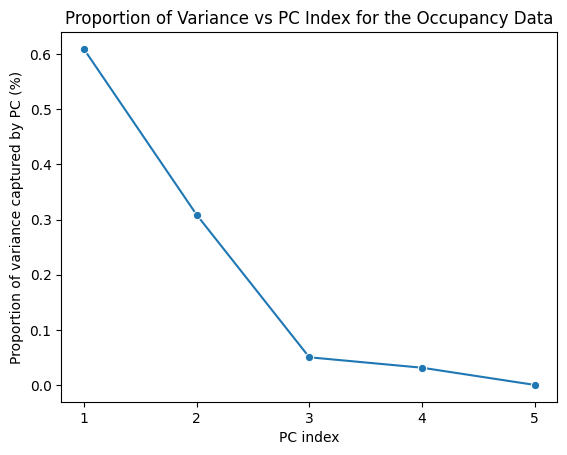

In [3]:
# read in data

# occupation data
occu_train = np.loadtxt('OccupancyTrain.csv', delimiter=',')
occu_test = np.loadtxt('OccupancyTest.csv', delimiter=',')

X_occu_train = occu_train[:,:-1]
y_occu_train = occu_train[:,-1]
X_occu_test = occu_test[:,:-1]
y_occu_test = occu_test[:,-1]

# pesticide data
weed_train = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
weed_test = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')

X_weed_train = weed_train[:,:-1]
y_weed_train = weed_train[:,-1]
X_weed_test = weed_test[:,:-1]
y_weed_test = weed_test[:,-1]

# standardize occupation data
scaler_occ = preprocessing.StandardScaler().fit(X_occu_train) # obtain mean and sd of training set
X_occu_train_S = scaler_occ.transform(X_occu_train) # standardize training set
X_occu_test_S = scaler_occ.transform(X_occu_test) # standardize test set

# standardize pesticide data
scaler_weed = preprocessing.StandardScaler().fit(X_weed_train) # obtain mean and sd of training set
X_weed_train_S = scaler_weed.transform(X_weed_train) # standardize training set
X_weed_test_S = scaler_weed.transform(X_weed_test) # standardize test set

# perform PCA on occupancy dataset
principal_components_occu, variance_occu = PCA(X_occu_train_S, X_occu_train_S.shape[0])

# plot variance vs PC index
sns.lineplot(x=np.arange(1, len(variance_occu) + 1), y=variance_occu, marker='o')
plt.xlabel('PC index')
plt.xticks(np.arange(1, len(variance_occu) + 1))
plt.ylabel('Proportion of variance captured by PC (%)')
plt.title('Proportion of Variance vs PC Index for the Occupancy Data')
plt.show()

/opt/anaconda3/envs/IDS-3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/IDS-3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/IDS-3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/IDS-3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

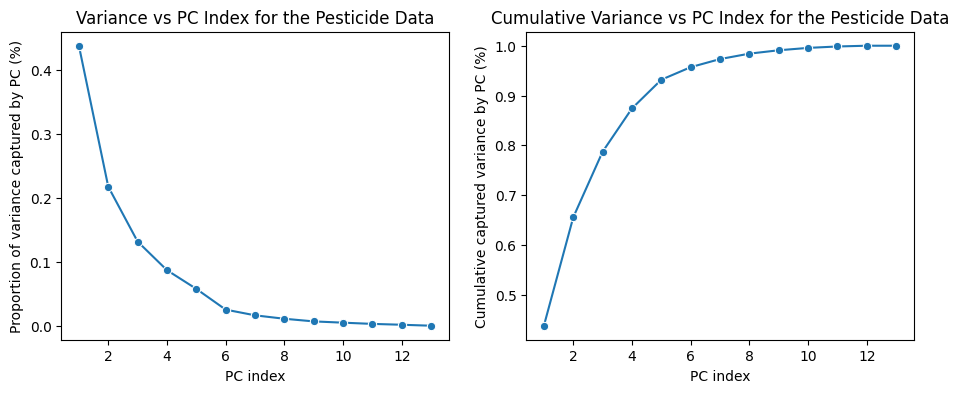

In [4]:
# perform PCA on pesticide dataset
principal_components_weed, variance_weed = PCA(X_weed_train_S, X_weed_train_S.shape[0])

# calculate cumulative variance
cumulative_variance_weed = np.cumsum(variance_weed) / np.sum(variance_weed)

fig, axs = plt.subplots(1, 2, figsize=(11,4))

# plot of variance vs PC index for pesticide data
sns.lineplot(x=np.arange(1, len(variance_weed) + 1), y=variance_weed, marker='o',ax=axs[0])
axs[0].set_xlabel('PC index')
axs[0].set_ylabel('Proportion of variance captured by PC (%)')
axs[0].set_title('Variance vs PC Index for the Pesticide Data')

# plot of cumulative variance versus PC for pesticide data
sns.lineplot(x=np.arange(1, len(variance_weed) + 1), y=cumulative_variance_weed, marker='o',ax=axs[1])
axs[1].set_xlabel('PC index')
axs[1].set_ylabel('Cumulative captured variance by PC (%)')
axs[1].set_title('Cumulative Variance vs PC Index for the Pesticide Data')
plt.show()

In [5]:
# calculate numbers of dimensions needed to capture 90% and 95% of variance for the pesticide data

# find index of cumulative variance list where cumulative variance >= 90% and >= 95% and add 1 to get number of dimensions
variance_90 = next(i for i, cum_var in enumerate(cumulative_variance_weed) if cum_var >= 0.9) + 1 
variance_95 = next(i for i, cum_var in enumerate(cumulative_variance_weed) if cum_var >= 0.95) + 1 

print(f"We need {variance_90} dimensions to capture 90% of the variance and {variance_95} dimensions to capture 95% of the variance.")

We need 5 dimensions to capture 90% of the variance and 6 dimensions to capture 95% of the variance.


#### Exercise 2: Visualization in 2D

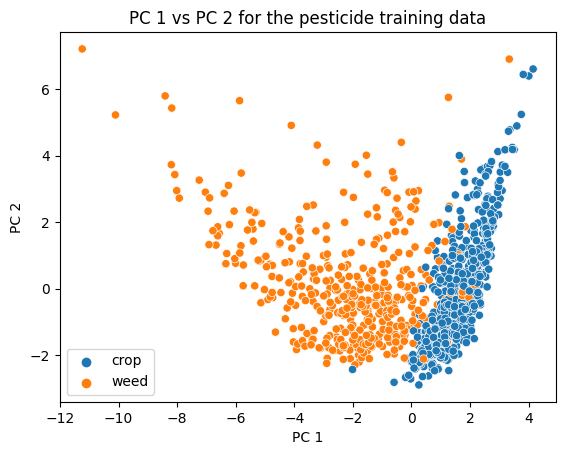

In [6]:
# use PCA function defined above with n_components = 2 for pesticide data
principal_comp_weed = PCA(X_weed_train_S, 2)[0]
PCA1_weed = principal_comp_weed[:, 0]
PCA2_weed = principal_comp_weed[:, 1]

# plot PC1 vs PC2

labels = ['weed' if label == 0 else 'crop' for label in y_weed_train] # labels for data points
sns.scatterplot(x=PCA1_weed, y=PCA2_weed, hue=labels)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PC 1 vs PC 2 for the pesticide training data')
plt.show() 

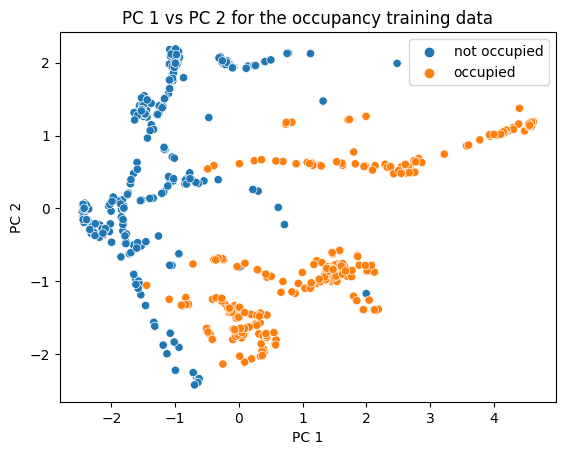

In [7]:
# use PCA function defined above with n_components = 2 for occupancy data
principal_comp_occu = PCA(X_occu_train_S, 2)[0]
PCA1_occu = principal_comp_occu[:, 0]
PCA2_occu = principal_comp_occu[:, 1]

labels = ['not occupied' if label == 0 else 'occupied' for label in y_occu_train] # labels for data points 

# plot PC1 vs PC2
sns.scatterplot(x=PCA1_occu, y=PCA2_occu, hue=labels)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PC 1 vs PC 2 for the occupancy training data')
plt.show() 

#### Description of implementation:

Because we are interested in a 2D-projection of the two data sets, I passed the number of dimensions (n=2) to the PCA function defined above. The function returned the unit vectors spanning the two principal components and I decided to plot the reduced data set (the original data projected onto the first two principal components) as a scatterplot$^{1}$ with the first principal component (PC1) on the x-axis and the second principal component (PC2) on the y-axis. By reducing the dimensions of our data set to two features that capture the highest variance, we can plot the first two principal components and visualize underlying patterns and clusters that would have been difficult to visualize in the original high-dimensional space. In this case, each data point in the original high-dimensional space of the pesticide and occupancy training data gets projected onto the first two PCs. We can observe that for example for the pesticide data we get two clusters where positive PC2 values generally correspond to "crop". Likewise, plotting the reduced occupancy dataset shows groupings and clusters of the data where there is a trend that positive PC1 values correspond to data points with the label "occupied".

$^{1}$ Note that plotting the two-dimensional data set could have been written in another function. Because we only had to plot two plots I decided not to do it since it would make customzing the labels more difficult.

#### Exercise 3: Critical thinking

#### Will applying centering before PCA make a difference?

Centering is the preprocessing step of transforming the data such that each feature has a have zero mean by substracting the mean of a feature from all of its data points. Shifting the data should not have an effect on the covariance matrix variance during PCA.$^{2}$ Thus, it also does not impact the directions of maximum variance or generally the variance that is captured in the diagonals of the covariance matrix.

We can see below in the second subplot, that centering does not change the relationship between the datapoints after dimensionality reduction to two dimensions, but it does affect the values or the range of PC1 and PC2. Gewers et al. (2020: 1) explain this by stating that the PC1 "can point in the direction of the mean" when centering is not applied to the data before conducting PCA. 

#### Will applying normalization before PCA make a difference?

Scaling the features (usually to a range between 0 and 1 by subtracting the minimum value of the feature and sunsequently dividing by the range) however will have an effect on the result of the PCA because the covariance is affected by multiplying with a scalar. Scaling is particularly advised when the magnitude of features differ significantly in scale (cf. Gewers at al. 2021: 70). Since for instance in the occupancy dataset "time" has a 100 times larger scale than "humidity", the former is likely to dominate the principal components only because its scale is larger. In the third subplot$^{3}$ we can see that normalizing/scaling the data does have an effect on the relationship of the data points for the first two principal components. Thus, it is crucial to apply normalization before conducting the PCA to prevent features with larger magnitudes to dominate the PCA.

$^{2}$ See mathematical proof for effect of both centering and scaling on the covariance matrix on https://sebastianraschka.com/faq/docs/pca-scaling.html, retrieved March 15, 2024.

$^{3}$ Note that the fourth subplot showing PC1 and PC2 for the standardized data was only included for completeness but it is not relevant for the task at hand.

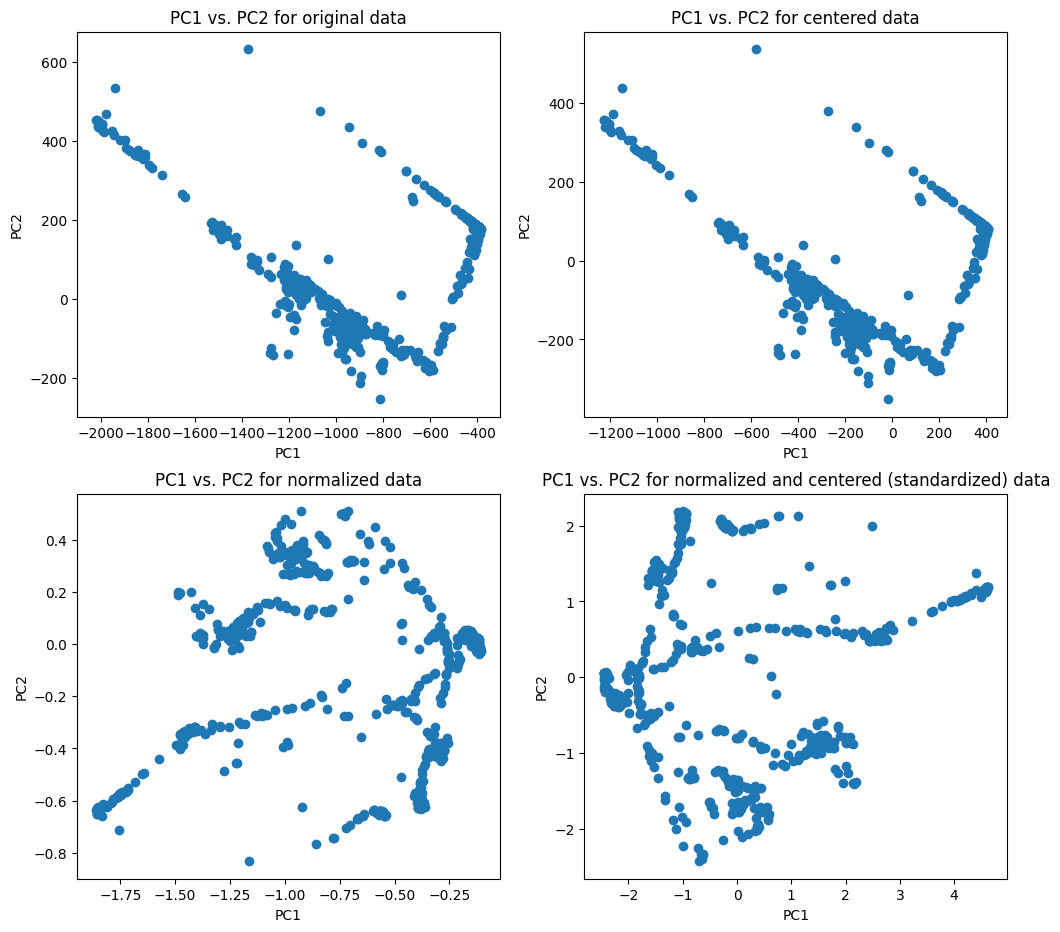

In [8]:
X_occu_train_centered = X_occu_train - np.mean(X_occu_train, axis=0) # preproccess data only with centering

def normalize_without_centering(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)
    return (X - min_val) / (max_val - min_val)

X_occu_train_normalized = normalize_without_centering(X_occu_train.copy()) # preprocess only with normalization

data_preprocessed = {'original': X_occu_train, # original data
                     'centered': X_occu_train_centered, # centered data
                     'normalized': X_occu_train_normalized, # normalized data 
                     'normalized and centered (standardized)': X_occu_train_S} # standardized data

fig, axs = plt.subplots(2, 2,figsize=(12, 11)) # plot first two 

for i, (label,data) in enumerate(data_preprocessed.items()):
    principal_comp_occu = PCA(data, 2)[0]
    PCA1_occu = principal_comp_occu[:, 0]
    PCA2_occu = principal_comp_occu[:, 1]
    
    row, col = divmod(i, 2)
    axs[row,col].scatter(PCA1_occu, PCA2_occu)
    axs[row,col].set_title(f"PC1 vs. PC2 for {label} data")
    axs[row,col].set_xlabel("PC1")
    axs[row,col].set_ylabel("PC2")
plt.show()

#### Gradient Descent
#### Exercise 4: Gradient descent & learning rates

In [9]:
def f(x): 
    return np.exp(-x/2) + 10*x**2

def der_f(x): # derivative of f(x)
    return -1/2 * np.exp(-x/2) + 20*x 

def gradient_descent(f,derivative_x, x0, learning_rate, tolerance=10**(-10), max_iter=10000):
    x = x0 # starting point
    n_iter = 0 # store number of iterations
    x_tangents = list() # x_values and tangent for first 10 iterations
    
    for i in range(max_iter):
        gradient = der_f(x) # compute derivative of f(x) at point x 
        new_x = x - learning_rate * gradient # compute new x value based on gradient
        if n_iter < 10: # store gradients for tangent lines for the first 10 iterations
            x_tangents.append((x, gradient)) 
        if abs(gradient) < tolerance: # check if gradient is smaller than tolerance
            return new_x, n_iter, x_tangents # return the last x value, number of iterations needed and the gradients of the first 10 iterations

        x = new_x
        n_iter +=1
    return x, n_iter, x_tangents

learning_rates = [0.1,0.01,0.001,0.0001] # learning rates
values = [gradient_descent(f,der_f,1,alpha) for alpha in learning_rates] # conduct gradient descent for all learning rates

# print number of iterations until convergence for each learning rate
for i,learning_rate in enumerate(learning_rates):
    print(f"For learning rate {learning_rate} gradient descent needs {values[i][1]} iterations until convergence. The function value at the final iteration was {values[i][0]}. \n ")

For learning rate 0.1 gradient descent needs 10000 iterations until convergence. The function value at the final iteration was nan. 
 
For learning rate 0.01 gradient descent needs 115 iterations until convergence. The function value at the final iteration was 0.024693232269269835. 
 
For learning rate 0.001 gradient descent needs 1272 iterations until convergence. The function value at the final iteration was 0.02469323227015602. 
 
For learning rate 0.0001 gradient descent needs 10000 iterations until convergence. The function value at the final iteration was 0.024693233808097063. 
 


/var/folders/ck/7wbpyljx7jdf7mryd7dn1b0c0000gn/T/ipykernel_47786/1291304340.py:5: RuntimeWarning: overflow encountered in exp
  return -1/2 * np.exp(-x/2) + 20*x
/var/folders/ck/7wbpyljx7jdf7mryd7dn1b0c0000gn/T/ipykernel_47786/1291304340.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  new_x = x - learning_rate * gradient # compute new x value based on gradient


#### Visualization of tangent lines and gradient descent steps for the first three iterations

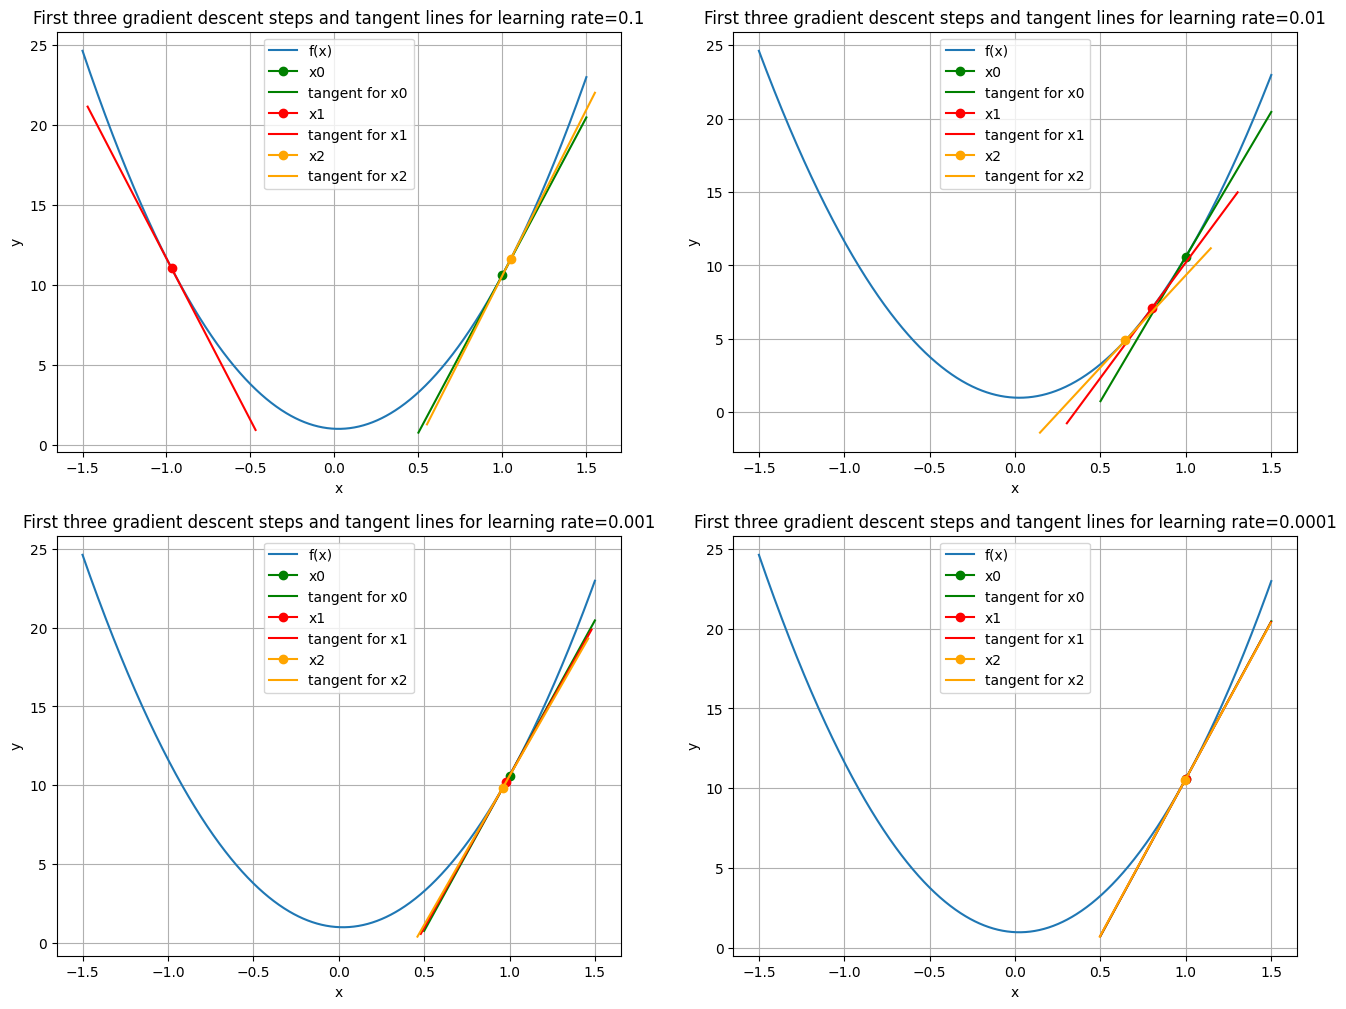

In [10]:
xs = np.linspace(-1.5,1.5,1000) # create x values for f(x)

fig, axs = plt.subplots(2, 2,figsize=(16, 12))

colors = ['green', 'red', 'orange'] # colours for the three x values and slopes

for i, learning_rate in enumerate(learning_rates): 
    row, col = divmod(i, 2) # get row and column number for suplots
    
    axs[row,col].plot(xs,f(xs), label="f(x)")
    axs[row,col].set_title(f"First three gradient descent steps and tangent lines for learning rate={learning_rate}")
    axs[row,col].grid()

    # plot tangent lines for first 3 iterations
    for j, value in enumerate(values[i][2][:3]): # iterate through values obtained from applying gradient descent above
        # [i][2][:3] means we look at the gradient of the first three iterations for each learning rate
        x = value[0] # x value
        slope= value[1] # corresponding slope or gradient of x
        x_values = np.linspace(x-0.5,x+0.5,30) # create x values for tangent lines
        y_values = slope * (x_values - x) + f(x) # create y values
        axs[row,col].plot(x,f(x), color=colors[j], marker="o", label=f"x{j}") # plot x values 
        axs[row,col].plot(x_values, y_values, color=colors[j], label=f"tangent for x{j}") # plot tangent lines
        axs[row,col].set_xlabel("x")
        axs[row,col].set_ylabel("y")
        axs[row, col].legend() 
plt.show()

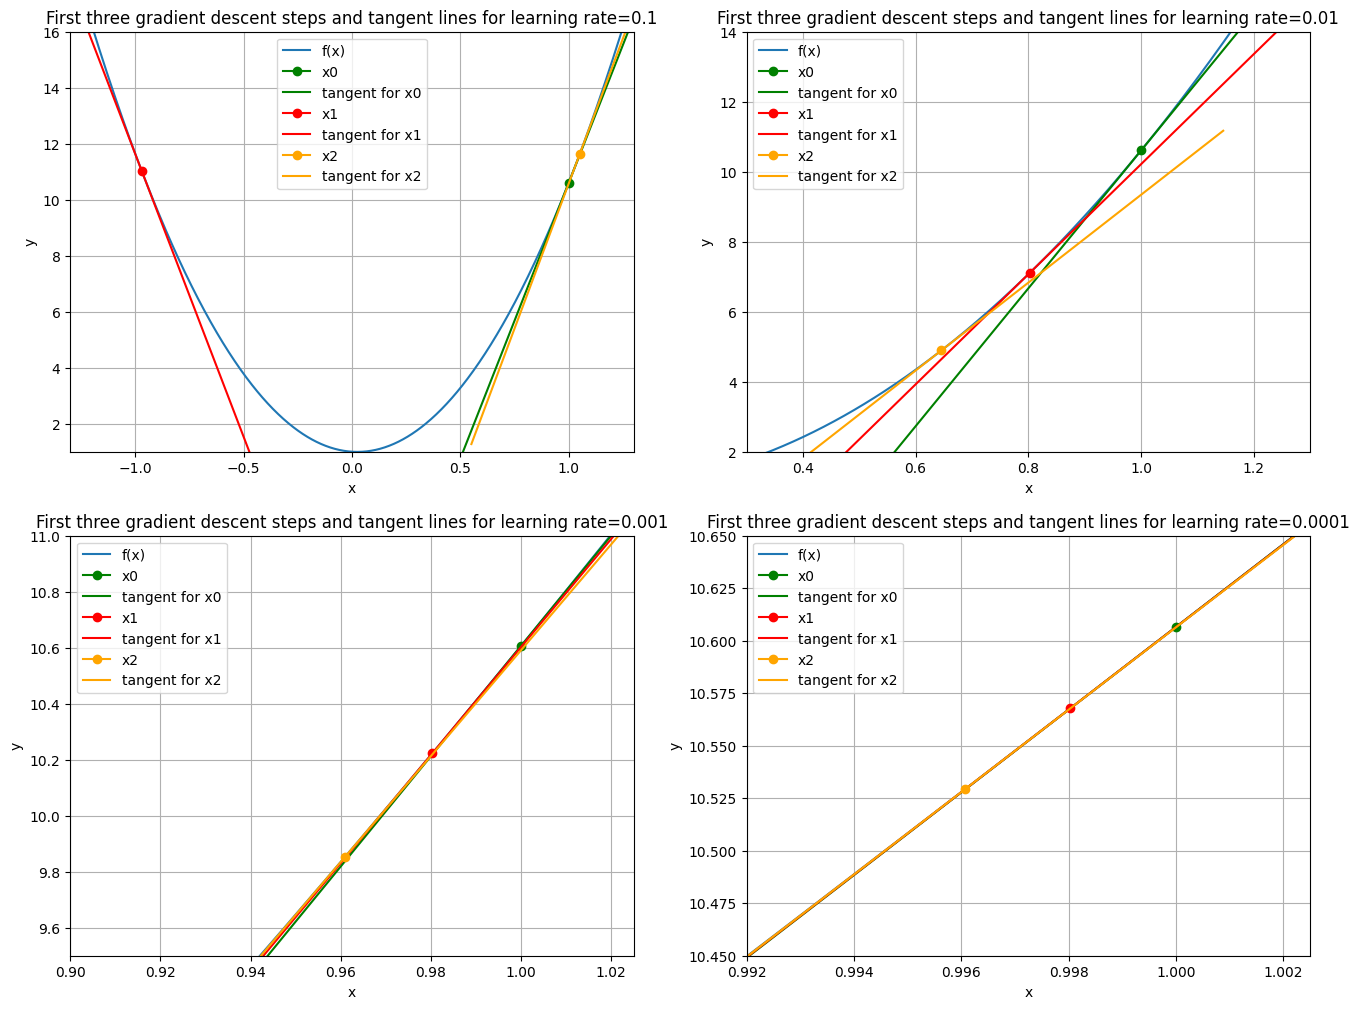

In [11]:
# plot with smaller ranges for x and y to zoom in 

fig, axs = plt.subplots(2, 2,figsize=(16, 12))

colors = ['green', 'red', 'orange'] # colours for the three x values and slopes
x_limits = [[-1.3,1.3],[0.3,1.3],[0.9,1.025],[0.992,1.0025]] # range for x axis in the plot, manually detected for better visualization
y_limits = [[1,16],[2,14],[9.5,11],[10.45,10.65]] # range for y axis in the plot, manually detected for better visualization


for i, learning_rate in enumerate(learning_rates):
    row, col = divmod(i, 2)
    
    axs[row,col].plot(xs,f(xs), label="f(x)")
    axs[row,col].set_title(f"First three gradient descent steps and tangent lines for learning rate={learning_rate}")
    axs[row,col].grid()
    axs[row,col].set_ylim(y_limits[i])
    axs[row,col].set_xlim(x_limits[i])

    # plot tangent lines for first 3 iterations
    for j, value in enumerate(values[i][2][:3]):
        x = value[0]
        slope= value[1]
        x_values = np.linspace(x-0.5,x+0.5,30)
        y_values = slope * (x_values - x) + f(x)
        axs[row,col].plot(x,f(x), color=colors[j], marker="o", label=f"x{j}") # plot x
        axs[row,col].plot(x_values, y_values, color=colors[j], label=f"tangent for x{j}")
        axs[row,col].set_xlabel("x")
        axs[row,col].set_ylabel("y")
        axs[row, col].legend() 
plt.show()

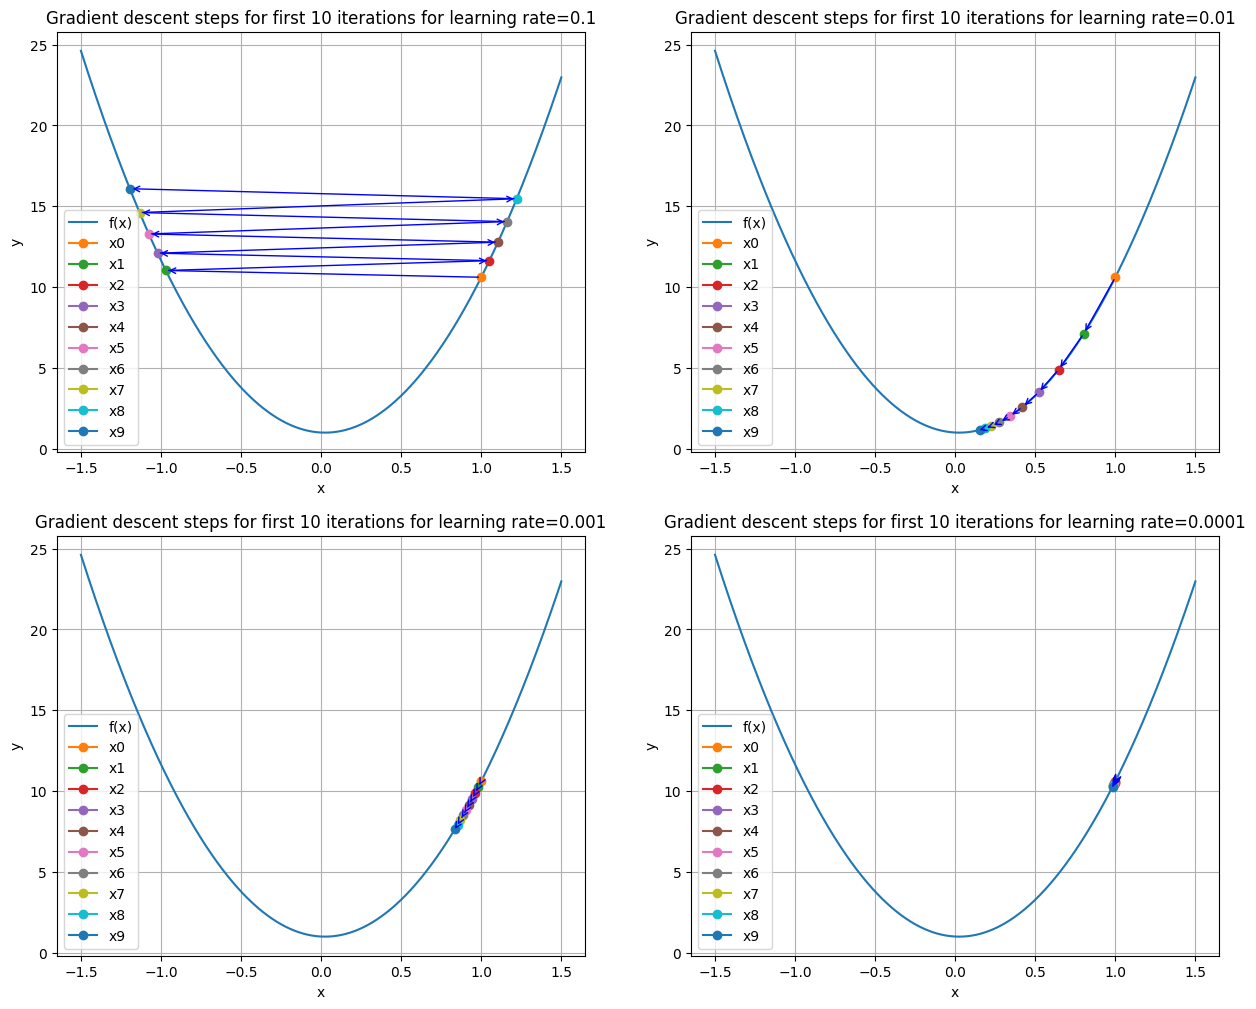

In [12]:
# visualize gradient descent steps for first 10 iterations

fig, axs = plt.subplots(2, 2,figsize=(15, 12))
for i, learning_rate in enumerate(learning_rates):
    row, col = divmod(i, 2)
    
    axs[row,col].plot(xs,f(xs), label="f(x)")
    axs[row,col].set_title(f"Gradient descent steps for first 10 iterations for learning rate={learning_rate}")
    axs[row,col].grid()

    # plot gradient descent steps for first 10 iterations
    for j, value in enumerate(values[i][2]):
        x = value[0]
        axs[row,col].plot(x,f(x), marker="o", label=f"x{j}") # plot x
        # plot arrow to next x
        try:
            x_next = values[i][2][j+1][0]
            axs[row, col].annotate("", xy=(x_next, f(x_next)), xytext=(x, f(x)),
                                   arrowprops=dict(arrowstyle="->", color='blue')) 
        except IndexError: # if there is no next x value
            pass
        axs[row,col].set_xlabel("x")
        axs[row,col].set_ylabel("y")
        axs[row, col].legend()
plt.show()

#### Discussion about preferred learning rate: 

Results from running the algorithm on the four learning rates:

- For learning rate 0.1 gradient descent needs 10000 iterations until convergence. The function value at the final iteration was nan. 
 
- For learning rate 0.01 gradient descent needs 115 iterations until convergence. The function value at the final iteration was 0.024693232269269835. 
 
- For learning rate 0.001 gradient descent needs 1272 iterations until convergence. The function value at the final iteration was 0.02469323227015602. 
 
- For learning rate 0.0001 gradient descent needs 10000 iterations until convergence. The function value at the final iteration was 0.024693233808097063. 



We can see that running the gradient descent algorithm with a learning rate of 0.1 results in the maximum number of iterations being reached, and the function value at the final iteration is 'nan.' This is likely due to the circumstance that x becomes too large, eventually reaching infinity, thereby causing an overflow in the exponential term. When we observe the plot showing the gradient steps of the first 10 iterations, we can observe that the steps are so large that the magnitude of x increases (it oscillates from positive to negative values while increasing its absolute value and overshooting the minimum), making it impossible to converge to the minimum of the function.
Additionally, the slopes of the tangent lines (gradients or the direction and steepness, so the slope of f(x) at point x) are steep and change their direction or sign in every iteration, as can be observed in the plot of the first three gradient descent steps and tangent lines. The gradient indicates the direction of steepeest ascent and a larger gradient suggest the algorithm should take large steps to converge towards the minimum since it wants to minimize f(x). These larger gradients cause the magnitude or absolute value of x to increase, while oscillating around the unique global minimum, rather than converging to it. Consequently, the learning rate is too large, and we should decrease it.

Running gradient descent with a learning rate of 0.01 leads to convergence to the minimum of the function (or at least close to it, x=0.024693232269269835) after only 115 iterations.  In the plot showing the gradient descent steps for the first ten iterations, we can observe that the 10th x value is already close to the minimum of the function.

Gradient descent with a learning rate of 0.001 requires more iterations until convergence compared to a learning rate of 0.01, namely 1272 iterations. It reaches a similar final value for the last x value: 0.02469323227015602. In the plot showing the first ten gradient steps for the third learning rate, we can see that gradient descent updates the value for x at a slower rate than with a learning rate of 0.01.

Running gradient descent with a learning rate of 0.0001 also reaches the maximum number of iterations, like with a learning rate of 0.1. However, it achieves a final x value of 0.024693233808097063, which is very close to the values obtained with running the algorithms with learning rates of 0.01 and 0.001. However, in the plots, we can see that it updates the new x value very slowly compared to the second and third learning rates. When looking at the tangent lines for the first three iterations we can observe that the slopes are almost identical (suggesting that they only differ by a very small value) which results in the slow updating of the new x value.

Consequently, choosing a learning rate that is too high (0.1) can lead to overshooting and prevent the algorithm from converging. A smaller learning rate (0.0001 and arguably 0.001) can lead to slow convergence. Thus, a learning rate of 0.01 is preferred in our case since it leads to stable and relatively fast convergence of the gradient descent algorithm, which is more computationally efficient.

#### Linear Regression
#### Exercise 5: Linear Regression

In [13]:
temperature_S = X_occu_train_S[:,0]
features_S = X_occu_train_S[:,1:4] # standardized features of relative humidity, light, CO2

# run linear regression to predict temperature from relative humidity, light and C02
regr = linear_model.LinearRegression() # instantiate linear regression model
regr.fit(features_S, temperature_S) # fit regression model on the data matrix with the input variables and the output vector

# print estimate of free parameters w_1, w_2, w_3
print(f"Linear regression to predict temperature from relative humidity, light and C02 yields an estimate of the free parameters:")
print(f"w_1={regr.coef_[0]}")
print(f"w_2={regr.coef_[1]}")
print(f"w_3={regr.coef_[2]}")

# print offset parameter w_0 
print(f"The offset parameter is w_0={regr.intercept_}.")
print()

# run linear regression to predict temperature from  relative humidity 
rel_humidity_S = features_S[:,0].reshape(-1, 1)

regr2 = linear_model.LinearRegression()
regr2.fit(rel_humidity_S, temperature_S)

# print estimate of free parameter w_1
print(f"Linear regression to predict temperature from relative humidity yields an estimate of the free parameter:")
print(f"w_1={regr2.coef_[0]}")

# print offset parameter w_0 
print(f"The offset parameter is w_0={regr2.intercept_}.")

Linear regression to predict temperature from relative humidity, light and C02 yields an estimate of the free parameters:
w_1=-0.36010666903784677
w_2=0.41408169961349717
w_3=0.5449262989086812
The offset parameter is w_0=-6.721149305536547e-14.

Linear regression to predict temperature from relative humidity yields an estimate of the free parameter:
w_1=-0.009387889127335906
The offset parameter is w_0=-6.39653177883233e-14.


#### Discussion of implementation:

I utilized the linear_model.LinearRegression function of sklearn to implement Linear Regression. The function "fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation" $^{4}$. After fitting the model, I print the estimates of the free paramaters w_1, w_2 and w_3 (or in the case of relative humidty only w_1) and the offset parameter w_0. The model essentially suggest that these parameters fit the data$^{5}$ best, meaning they minimize the sum of squared errors.

#### Short Description of estimated parameters:
##### Multiple Linear Regression with three variables:

The estimated free parameters essentially indicate how much a features contributes to the prediction of the temperature. w_1 (relative humidity) has a negative coefficient (-0.36010666903784677), suggesting that when relative humidty increases, the temperature decreases. w_2 (light) has a positive coefficient (0.41408169961349717), indicating that as light increases, the temperature also tends to increase. w_3 (CO2) also has a positive coefficient (0.5449262989086812), suggesting that as CO2 levels increase, the temperature also tends to increase. 
w_3 has the largest absolute value, suggesting that it contributes the most in predicting the temperature. The offset parameter represents the intercept or baseline temperature when the other features are 0. In our case, it is close to 0, indicating that it does not influence the prediction a lot.

##### Univariate Linear Regression with one variable:

The estimated free parameter w_1 is -0.009387889127335906, suggesting that when relative humidty increases, the temperature decreases. It is lower than in the multiple linear regression model (possibly due to the fact that we only consider one variable and have no influence of the other variables). The offset parameter w_0=-6.39653177883233e-14, thus again close to 0.

$^{4}$ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html, retrieved March 13, 2024.
$^{5}$ Not that the data has been standardized before passing it to the model.

#### Exercise 6: Evaluate Linear Regression

In [14]:
def rmse(pred_y, y): # implement root means square error
    return np.sqrt(1/len(pred_y) * sum((np.abs(y_i - y_hat)**2 for y_i, y_hat in zip(y, pred_y))))

# rmse of model predicting temperature from relative humidty
rel_hum_test_S = X_occu_test_S[:,1] # relative humidity of the test set 

pred_y = regr2.predict(rel_hum_test_S.reshape(-1,1)) # predict temperature from relative humidity of the test set 

temperature_test_S = X_occu_test_S[:,0] # temperature values of the test set 

rmse_rel_hum = rmse(pred_y,temperature_test_S) # calculate root means square error for predicted temperature and ture test set temperature
print(f"The root means square error of the regression model predicting temperature from relative humidity is \n {rmse_rel_hum}.")

print()
# rmse of model predicting temperature from relative humidity, light, and CO2

features_test_S = X_occu_test_S[:,1:4] # test set relative humidity, light, and CO2
pred_y_3_features = regr.predict(features_test_S) # predicted temperature
rmse_3_features = rmse(pred_y_3_features, temperature_test_S) # calculate root means square error
print(f"The root means square error of the regression model predicting temperature from relative humidity, light and CO2 is {rmse_3_features}.")

The root means square error of the regression model predicting temperature from relative humidity is 
 1.206712637668076.

The root means square error of the regression model predicting temperature from relative humidity, light and CO2 is 0.8820484272152361.


#### Discussion:

The root mean square error (RMSE) is an evaluation metric to assess the performance of a regression model. It measures "the square root of the mean of the square of all of the error" (Christie & Neil 2022).
To put it simply, it tells us how far off the predictions are from the actual value of the target variable.

Thus, a RMSE of 1.206712637668076 for the univariate linear regression model indicates that on average the model has an error of 1.206712637668076 °C in predicting the temperature from relative humidity. A RMSE of 0.8820484272152361 in case of the multivariate linear regression model means that on average the predicted temperature differs about 0.8820484272152361 °C from the actual temperature. 

The RMSE of the multivariate linear regression model predicting temperature from three features is smaller than the RMSE of the model using only one feature. This indicates that the model can make better predictions about temperature if using the additional features light and C02 level and that the model can fit the data better when including these additional features. 

#### References

Christie, D., & Neill, S. P. (2022). Measuring and observing the ocean renewable energy resource. Comprehensive renewable energy, 8, 149-175.

Gallagher, N. B., O’Sullivan, D., & Palacios, M. (2020). The Effect of Data Centering on PCA Models.

Gewers, F. L., Ferreira, G. R., Arruda, H. F. D., Silva, F. N., Comin, C. H., Amancio, D. R., & Costa, L. D. F. (2021). Principal component analysis: A natural approach to data exploration. ACM Computing Surveys (CSUR), 54(4), 1-34.

Shlens, J. (2014). A tutorial on principal component analysis. arXiv preprint arXiv:1404.1100.



Gemini 1.0 Pro was used to create the outline and row, column participation for the subplots in Ex. 3 and 4 (not the plots themselves), the normalizing without centering function in Ex. 3 and for error detection.

ChatGPT Version 3.5 was used for grammar and spell checking and to create custom labels in exercise 2.